# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

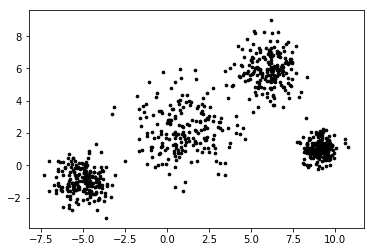

In [2]:
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + np.array([1,2])
data_2 = np.random.randn(200,2) * 1.0 + np.array([6,6])
data_3 = np.random.randn(200,2) * 0.5 + np.array([9,1])
data_4 = np.random.randn(200,2) * 0.8 + np.array([-5,-1])

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

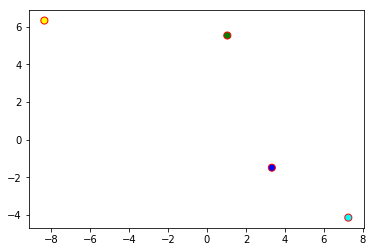

In [3]:
k = 4
colors = ['green','blue','yellow', 'cyan']
np.random.seed(6)
centres = np.random.randn(k, 2) * data.std() + data.mean()
plt.scatter(centres[:,0], centres[:,1], s=50, color=colors, edgecolors = 'red')
plt.show()

## 2. Visualise the clustering results in each iteration

K means clustering takes each data point, find its closest centre point and assigns it to that centre. Once all points are assigned, the centers are then moved to the center of its assigned points by finding the average distance between all assigned points. This process is repeated until approximations are close enough. This algorithim is logirithmically successful, i.e the first 3 iterations will result in faster results than iterations 30-33. The first 5 iterations are plotted below.

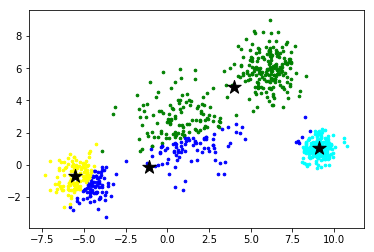

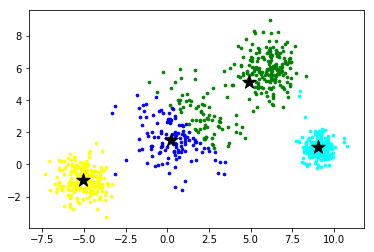

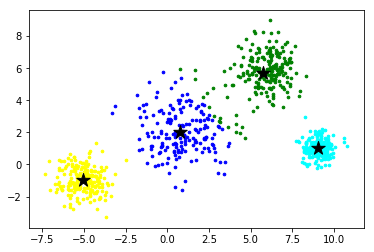

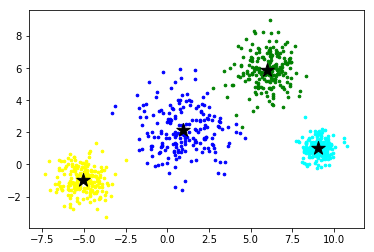

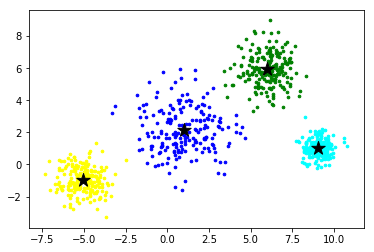

In [4]:
clusters = np.zeros(len(data))
def dist(a, b, ax=1): return np.linalg.norm(a - b, axis=ax)

for i in range(5):
    # Assign each data point to its closest cluster
    for i in range(len(data)):
        distances = dist(data[i], centres)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    # Calculate new centers by taking the average value
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centres[i] = np.mean(points, axis=0)

    # Plot each cluster
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        
    # Plot centers
    ax.scatter(centres[:, 0], centres[:, 1], marker='*', s=200, c="black")